# Домашнее задание
С вашим датасетом нужно проделать примерно то же самое, что мы делали с примером "12-6. Оценка стоимости квартиры.ipynb" Обратите внимание, что у вас - может быть задача классификации, а мы решали задачу регрессии  (также можно посмотреть 19-02. Adult.ipynb, где решается задача классификации) (https://github.com/NikolaiZolotykh/MachineLearningCourse). Все должно быть выложено на ваш гит.

А именно:
0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра)
9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. Запустить другие классификаторы и выбать параметры. Выбрать релевантные! Сравнить результаты
11. как-то побороться с несбалансированностью классов (если она есть)
12. исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

## 0. Описание задачи
Задача: Классификация различных типов ритмов сердца (нозологий) на основе набора данных, содержащего
параметры, описывающие работу сердечно-сосудистой системы. Цель — создать модель, которая сможет 
правильно классифицировать различные состояния ритма сердца.

Набор данных:
- Файл three_bases_meta.csv содержит метаданные с описанием признаков.
- Файлы three_bases_X.npy и three_bases_Y.npy содержат признаки и целевые классы для задачи.

## 1. Прочитать данные

In [10]:
import pandas as pd
import numpy as np

# Загрузка данных
# Описание признаков
meta = pd.read_csv('/home/dbulgakov/ml/lectures/data/three_bases_meta.csv')
# Массив признаков
X = np.load('/home/dbulgakov/ml/lectures/data/three_bases_X.npy', mmap_mode='r')
# Целевые классы (типы ритмов сердца)
y = np.load('/home/dbulgakov/ml/lectures/data/three_bases_Y.npy')

## 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

Выведем примеры данных, содержащихся в загруженных данных

Файл с метаданными:

In [11]:
from tabulate import tabulate
print(meta.shape)
print(tabulate(meta.head().reset_index(drop=True), headers='keys', tablefmt='pretty', showindex=False))

(77243, 6)
+--------------+------+--------+-------------------------------+----------------------+--------------------------+
| Record index | Age  | Gender | Patient ID in source database | Source database name | Index in source database |
+--------------+------+--------+-------------------------------+----------------------+--------------------------+
|      0       | 56.0 |  муж   |            15709.0            |        ptb_xl        |            1             |
|      1       | 19.0 |  жен   |            13243.0            |        ptb_xl        |            2             |
|      2       | 37.0 |  муж   |            20372.0            |        ptb_xl        |            3             |
|      3       | 24.0 |  жен   |            17014.0            |        ptb_xl        |            4             |
|      4       | 19.0 |  муж   |            17448.0            |        ptb_xl        |            5             |
+--------------+------+--------+-------------------------------+-----

В файле с метаданными находятся следующие признаки для каждой записи:
1. индекс пациента
1. возраст
1. пол (муж, жен)
1. id пацинта в базе данных
1. название базы данных
1. индекс пациента в базе данных


Выведем пример данных из массива признаков


Размер данных X: (77243, 12, 5000)


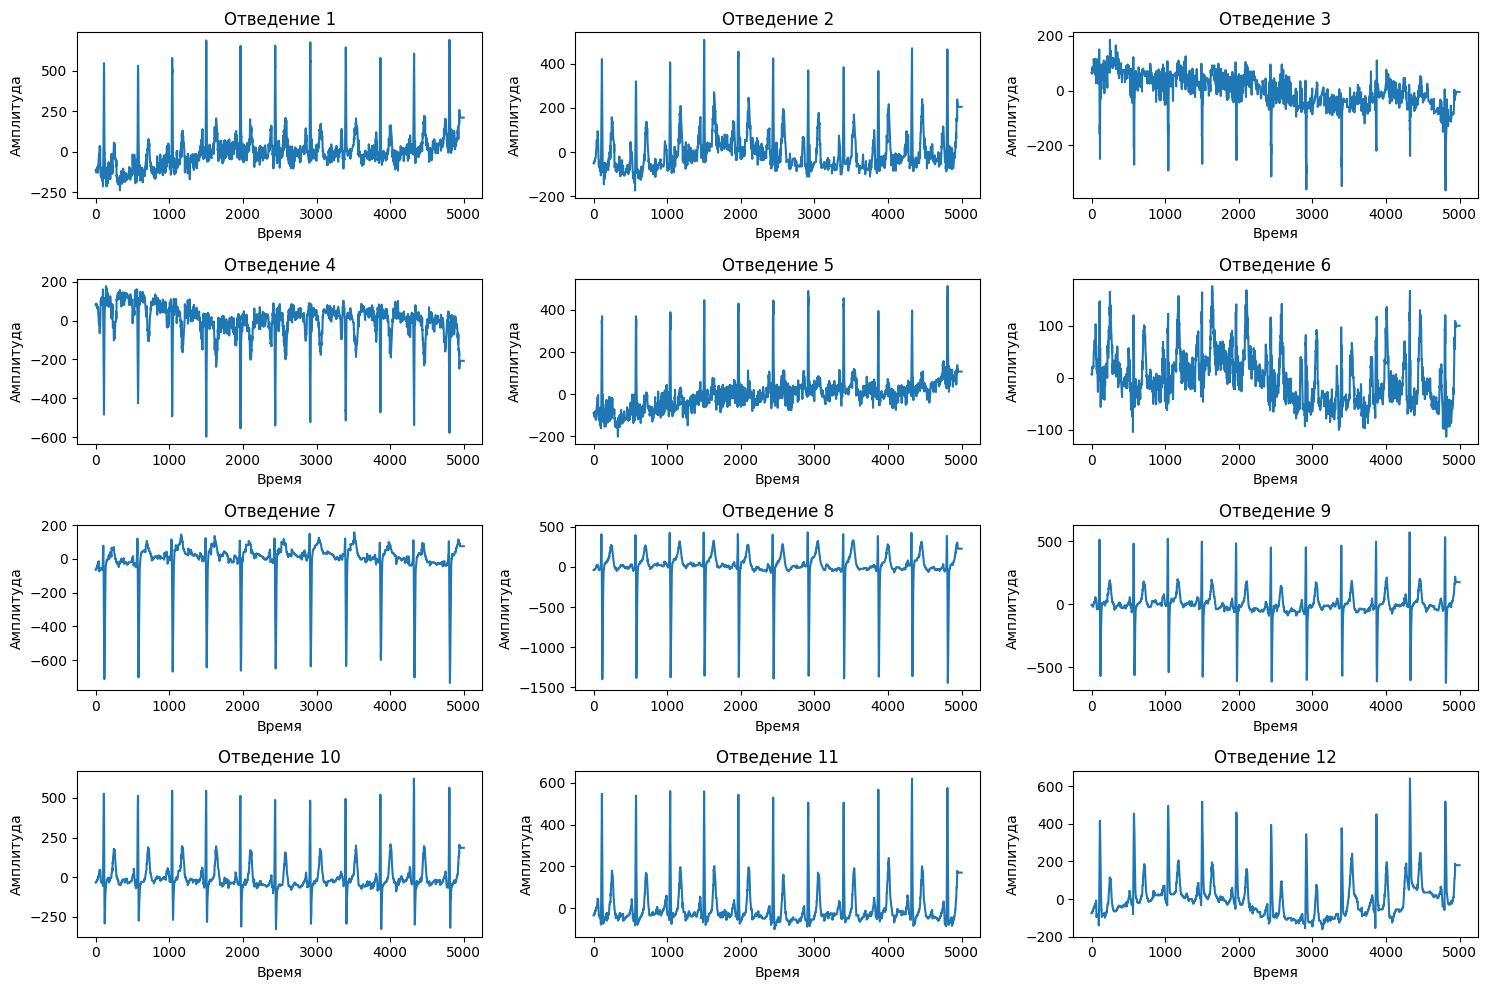

In [12]:
import matplotlib.pyplot as plt 
print("\nРазмер данных X:", X.shape)

fig, axes = plt.subplots(4, 3, figsize=(15, 10))

for i in range(12):
    ax = axes[i // 3, i % 3]
    ax.plot(X[0][i])
    ax.set_title(f"Отведение {i + 1}")
    ax.set_xlabel("Время")
    ax.set_ylabel("Амплитуда")

plt.tight_layout()
plt.show()

Массив признаков представлен 3-ех мерной матрицей, где 77243 записей с 12 каналов экг по 5 секунд записи с частотой дискретизации в 1000 Гц.

Рассмотрим масив целей

In [13]:
print("Размер данных y:", y.shape)

nosologies = [
    "Синусовый ритм",
    "Синусовая тахикардия",
    "Синусовая брадикардия",
    "Синусовая аритмия",
    "Предсердный ритм",
    "Узловой ритм",
    "Фибрилляция предсердий",
    "Трепетание предсердий: правильная и неправильная форма",
    "Наджелудочковая экстрасистолия",
    "Желудочковая экстрасистолия",
    "Тахикардия с узкими комплексами QRS",
    "Тахикардия с широкими комплексами QRS",
    "АВ-блокада I ст.",
    "АВ-блокада II ст. 1 тип.",
    "АВ-блокада II ст. 2 тип.",
    "АВ-блокада III ст.",
    "Уширение комплекса QRS, требующее верификации",
    "Синдром короткого интервала PQ",
    "Синдром удлиненного интервала QT",
    "Синдром короткого интервала QT"
]

print("Тип болезни для первой записи")

df = pd.DataFrame({
    "Нозология": nosologies,
    "Значение": y[77000]
})

print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False, colalign=("left", "left")))

Размер данных y: (77243, 20)
Тип болезни для первой записи
+--------------------------------------------------------+----------+
| Нозология                                              | Значение |
+--------------------------------------------------------+----------+
| Синусовый ритм                                         | False    |
| Синусовая тахикардия                                   | False    |
| Синусовая брадикардия                                  | False    |
| Синусовая аритмия                                      | False    |
| Предсердный ритм                                       | False    |
| Узловой ритм                                           | False    |
| Фибрилляция предсердий                                 | False    |
| Трепетание предсердий: правильная и неправильная форма | False    |
| Наджелудочковая экстрасистолия                         | False    |
| Желудочковая экстрасистолия                            | False    |
| Тахикардия с узкими комплекса

Также можем сделать интерсную сводку используя класс с метаданными, чтобы узнать, к примеру, средний возраст

In [14]:
# 1. Средний возраст
mean_age = meta['Age'].mean()
print(f"Средний возраст пациентов: {mean_age:.2f} лет")

# 2. Распределение по полу (Gender)
gender_distribution = meta['Gender'].value_counts(normalize=True) * 100
print("\nРаспределение по полу:")
print(gender_distribution)

# 3. Наиболее часто встречающийся возраст для каждой болезни
mean_ages = []

for i in range(y.shape[1]):
    disease_column = y[:, i]
    # Индексы пациентов с положительным диагнозом
    positive_indices = np.where(disease_column == True)[0]
    
    # Все возраста этих пациентов
    ages_of_positive_patients = meta.loc[positive_indices, "Age"]
    
    # Если есть хотя бы один положительный случай, считаем средний возраст
    if len(ages_of_positive_patients) > 0:
        mean_age_for_disease = ages_of_positive_patients.mean()
    else:
        mean_age_for_disease = np.nan
    
    mean_ages.append(np.round(mean_age_for_disease, 2))

df = pd.DataFrame({
    "Нозология": nosologies,
    "Значение": mean_ages
})

print("\nНаиболее часто встречающийся возраст для каждой болезни")
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False, colalign=("left", "left")))

Средний возраст пациентов: 59.81 лет

Распределение по полу:
Gender
жен    54.830274
муж    45.169726
Name: proportion, dtype: float64

Наиболее часто встречающийся возраст для каждой болезни
+--------------------------------------------------------+----------+
| Нозология                                              | Значение |
+--------------------------------------------------------+----------+
| Синусовый ритм                                         | 57.58    |
| Синусовая тахикардия                                   | 53.23    |
| Синусовая брадикардия                                  | 58.54    |
| Синусовая аритмия                                      | 42.76    |
| Предсердный ритм                                       | 69.33    |
| Узловой ритм                                           | nan      |
| Фибрилляция предсердий                                 | 75.5     |
| Трепетание предсердий: правильная и неправильная форма | 72.38    |
| Наджелудочковая экстрасистолия      

Для вычислений возьмем часть данных

In [15]:
# Для анализа возьмем только часть данных
start=0
end=10000
X = X[start:end]
y = y[start:end]
meta = meta[start:end]

Вычислим основные характеристики: среднее, разброс, корреляционную матрицу и др.

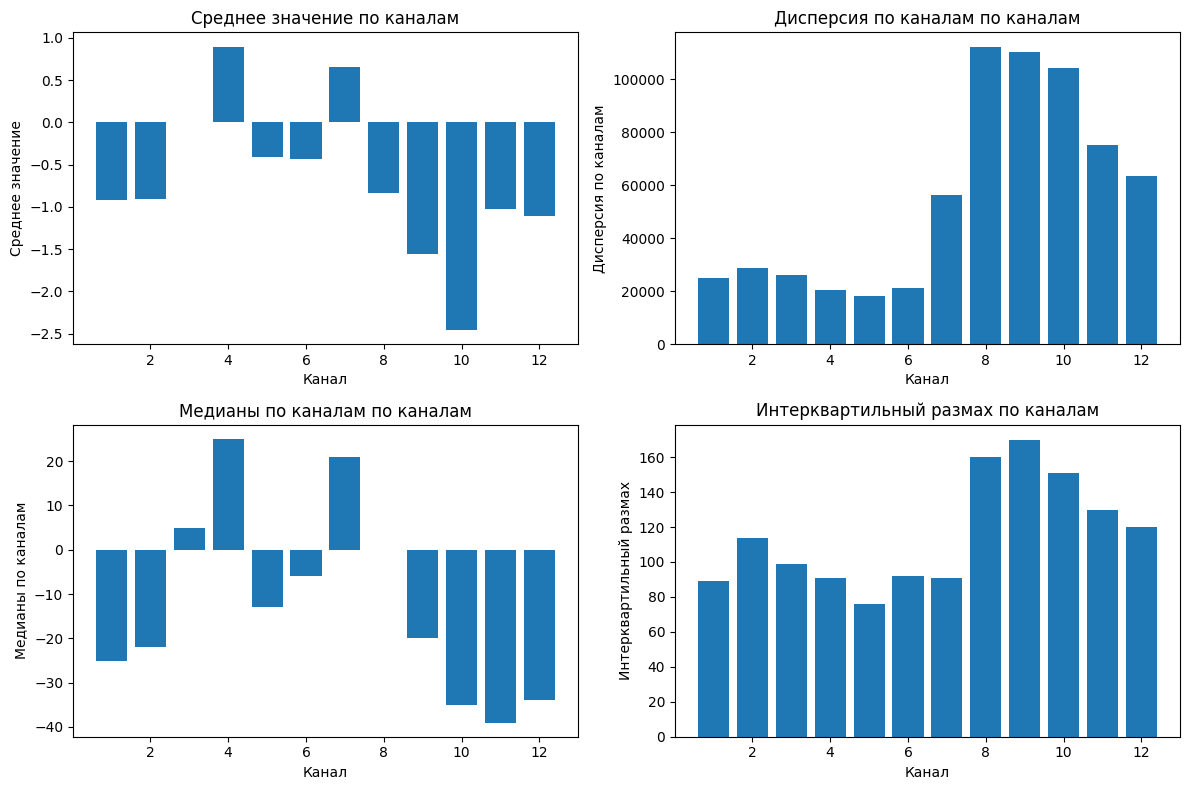

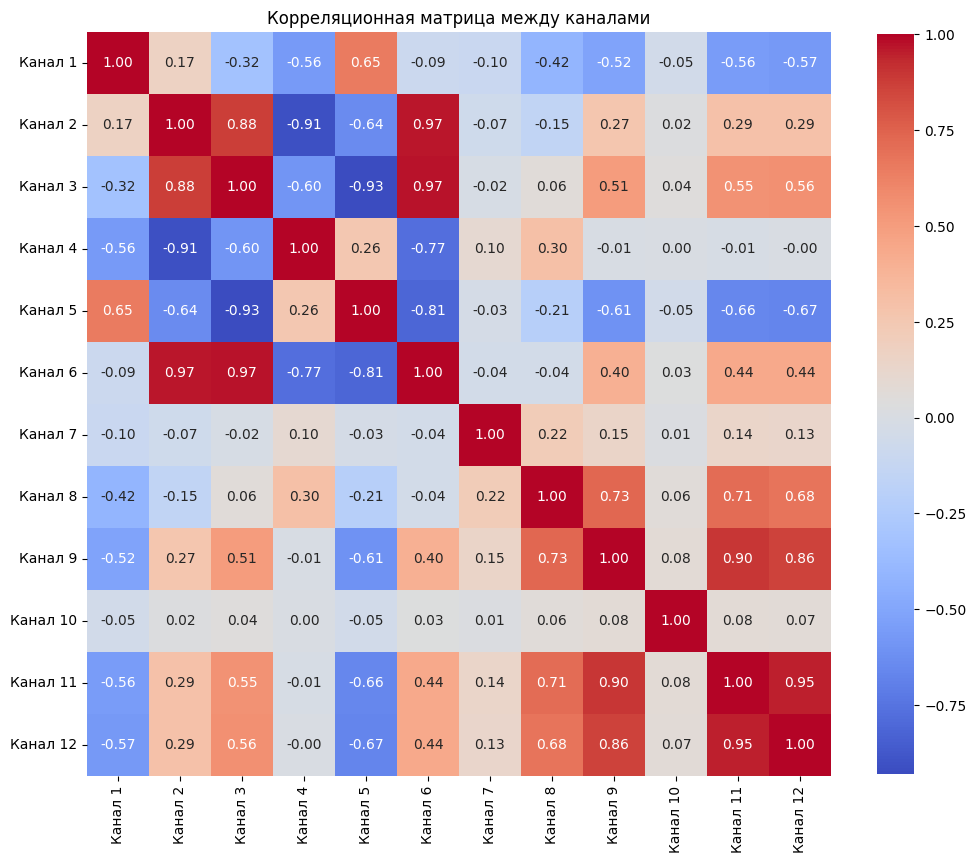

In [16]:
import seaborn as sns

# axis=(0, 2), т.к. берем среднее вдоль оси временных меток и приводим к двумерному массиву
# Рассчёт среднего и разброса по каждому каналу
mean_values = X.mean(axis=(0, 2))
variance_values = X.var(axis=(0, 2))
# Медиана и интерквартильный размах по каналам
median_values = np.median(X, axis=(0, 2))
iqr_values = np.percentile(X, 75, axis=(0, 2)) - np.percentile(X, 25, axis=(0, 2))

def subplot_helper(index, values, name):
    plt.subplot(2, 2, index)
    plt.bar(range(1, 13), values)
    plt.xlabel('Канал')
    plt.ylabel(f'{name}')
    plt.title(f'{name} по каналам')

# Визуализация среднего и разброса
plt.figure(figsize=(12, 8))
subplot_helper(1, mean_values,      "Среднее значение")
subplot_helper(2, variance_values,  "Дисперсия по каналам")
subplot_helper(3, median_values,    "Медианы по каналам")
subplot_helper(4, iqr_values,       "Интерквартильный размах")
plt.tight_layout()
plt.show()

# Корреляционная матрица
X_mean_per_channel = X.mean(axis=2)
X_mean_df = pd.DataFrame(X_mean_per_channel, columns=[f"Канал {i+1}" for i in range(X.shape[1])])
correlation_matrix = X_mean_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Корреляционная матрица между каналами")
plt.show()


#### Чарты по статистическим метрикам:
1. *Среднее значение по каналам:* Видно, что средние значения сигналов для различных отведений (каналов) сильно варьируются, причём несколько каналов имеют отрицательные средние значения.

1. *Дисперсия по каналам:* Дисперсия сигналов существенно увеличивается на каналах с 8 по 12.

1. *Медиана по каналам:* Медианы имеют некоторые различия, но их поведение в целом похоже на распределение средних значений. Это говорит о том, что сигналы не сильно искажены выбросами.

1. *Интерквартильный размах:* Наибольший размах наблюдается также в каналах 8–12, что согласуется с высокой дисперсией.

#### Корреляционная матрица:
1. *Высокая корреляция между отдельными каналами:* Например, каналы 2 и 6 имеют почти идеальную положительную корреляцию (0.97). Это может указывать на наличие избыточной информации между этими каналами.

1. *Антикорреляции:* Между каналами 3 и 5, 3 и 4 наблюдаются сильные отрицательные корреляции (-0.93 и -0.91). Это указывает на то, что сигналы в этих каналах имеют противоположное поведение, что может быть физиологически значимо.

1. *Кластеры корреляции:* Видно, что каналы делятся на группы: некоторые из них сильно коррелируют между собой, а другие – слабо. Это может указывать на физиологическую структуру данных или алгоритмическую обработку.

## 3. Обработка пропущенных значений

In [17]:
# Проверка пропущенных значений в метаданных
print("Проверка пропущенных значений в meta:")
print(meta.isna().sum())
print(f"Количество пропущенных значений в X: {np.isnan(X).sum()}")
print(f"Количество пропущенных значений в y: {np.isnan(y).sum()}")

Проверка пропущенных значений в meta:
Record index                     0
Age                              2
Gender                           1
Patient ID in source database    2
Source database name             0
Index in source database         0
dtype: int64
Количество пропущенных значений в X: 0
Количество пропущенных значений в y: 0


## 4. Обработать категориальные признаки

In [18]:
meta['Gender'] = meta['Gender'].astype('category')
meta['Gender'].dtype
meta.describe(include=['category'])

meta = pd.get_dummies(meta, columns=['Gender'], drop_first=True)

print(tabulate(meta.head().reset_index(drop=True), headers='keys', tablefmt='pretty', showindex=False))

+--------------+------+-------------------------------+----------------------+--------------------------+------------+
| Record index | Age  | Patient ID in source database | Source database name | Index in source database | Gender_муж |
+--------------+------+-------------------------------+----------------------+--------------------------+------------+
|      0       | 56.0 |            15709.0            |        ptb_xl        |            1             |    True    |
|      1       | 19.0 |            13243.0            |        ptb_xl        |            2             |   False    |
|      2       | 37.0 |            20372.0            |        ptb_xl        |            3             |    True    |
|      3       | 24.0 |            17014.0            |        ptb_xl        |            4             |   False    |
|      4       | 19.0 |            17448.0            |        ptb_xl        |            5             |    True    |
+--------------+------+-------------------------

## 5. Нормализация данных

In [19]:
# Применим к массиву признаков min-max оптимизацию
X_normalized = X / np.max(np.abs(X), axis=1, keepdims=True)
X_last_channel = X_normalized[:, 1, :]
# Преобразуем многоклассовые метки массива целей в бинарные
y_reshaped = np.any(y, axis=1)

## 6. Разделение на обучающую и тестовую выборки

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_last_channel, y_reshaped, test_size=0.4, random_state=42)

## 7. Запустить классификатор (регрессию) ближайших соседей

In [21]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier


# Создание и обучение классификатора KNN с начальным значением k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average="binary")
print("F1-score (binary):", f1)

F1-score (binary): 0.977482088024565


## 8. Подобрать оптимальное значение к-ва ближайших соседей

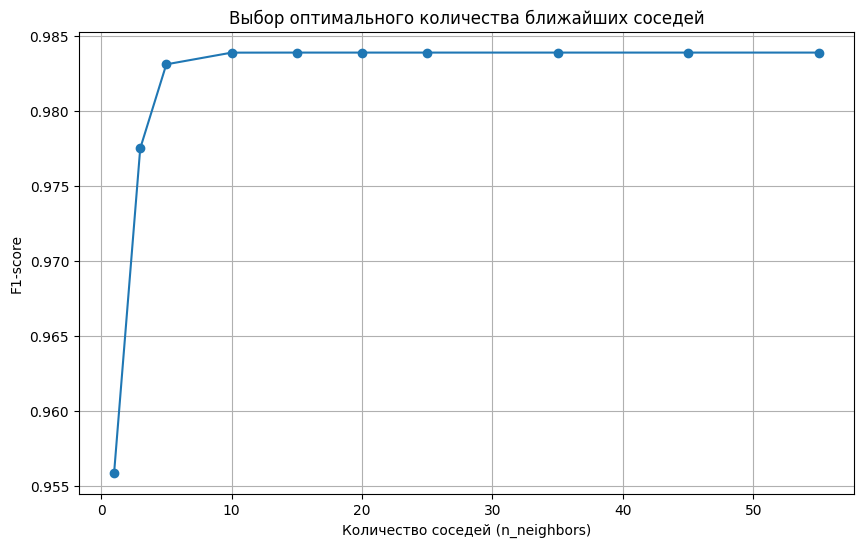

Оптимальное количество соседей: 15
Максимальный F1-score: 0.9839


In [22]:
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
f1_scores = []
knn = KNeighborsClassifier()
for n in nnb:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="binary")
    f1_scores.append(f1)

# Визуализация F1-score для каждого значения n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(nnb, f1_scores, marker='o', linestyle='-')
plt.title('Выбор оптимального количества ближайших соседей')
plt.xlabel('Количество соседей (n_neighbors)')
plt.ylabel('F1-score')
plt.grid(True)
plt.show()

optimal_n_neighbors = nnb[np.argmax(f1_scores)]
print(f"Оптимальное количество соседей: {optimal_n_neighbors}")
print(f"Максимальный F1-score: {max(f1_scores):.4f}")

## 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 

In [23]:
knn = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Вычисление F1-score
f1_train = f1_score(y_train, y_train_pred, average="binary")
f1_test = f1_score(y_test, y_test_pred, average="binary")

# Вывод результатов
print(f"F1-score на обучающей выборке: {f1_train:.4f}")
print(f"F1-score на тестовой выборке: {f1_test:.4f}")
difference = abs(f1_train - f1_test)
print(f"Разница между обучающей и тестовой выборками: {difference:.4f}")

F1-score на обучающей выборке: 0.9836
F1-score на тестовой выборке: 0.9839
Разница между обучающей и тестовой выборками: 0.0003


Значения на обучающей и тестовой выборке примерно равны.

Получается что модель успешно обучилась находить закономерности в данных, при этом не запомнив их "дословно".

## 10. Запустить другие классификаторы и выбать параметры. Выбрать релевантные! Сравнить результаты

Результаты классификаторов (F1-score):
K-Nearest Neighbors: 0.9839
Random Forest: 0.9837
Logistic Regression: 0.9694
Support Vector Machine: 0.9531


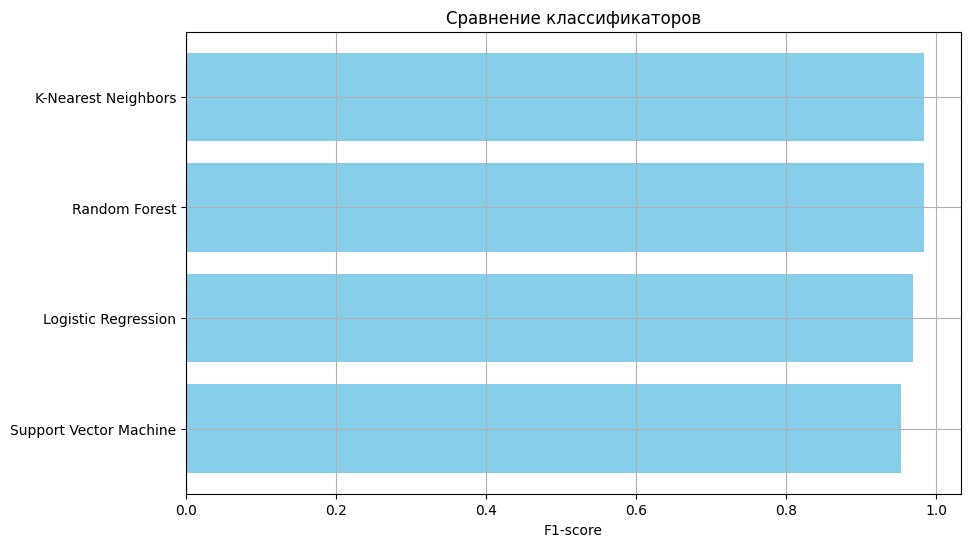

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=optimal_n_neighbors),
}

# Оценка моделей
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_test_pred, average="binary")
    results[name] = f1

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Вывод результатов
print("Результаты классификаторов (F1-score):")
for name, score in sorted_results:
    print(f"{name}: {score:.4f}")

# Построение графика
names, scores = zip(*sorted_results)
plt.figure(figsize=(10, 6))
plt.barh(names, scores, color="skyblue")
plt.xlabel("F1-score")
plt.title("Сравнение классификаторов")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

**Random Forest** и **KNN** превосходят другие модели, такие как Logistic Regression и SVM, потому что они лучше справляются с задачами, где:
    
1. Признаки имеют сложные или нелинейные зависимости.
1. Требуется обработка множества признаков с высокой вариативностью.

## 11. как-то побороться с несбалансированностью классов (если она есть)

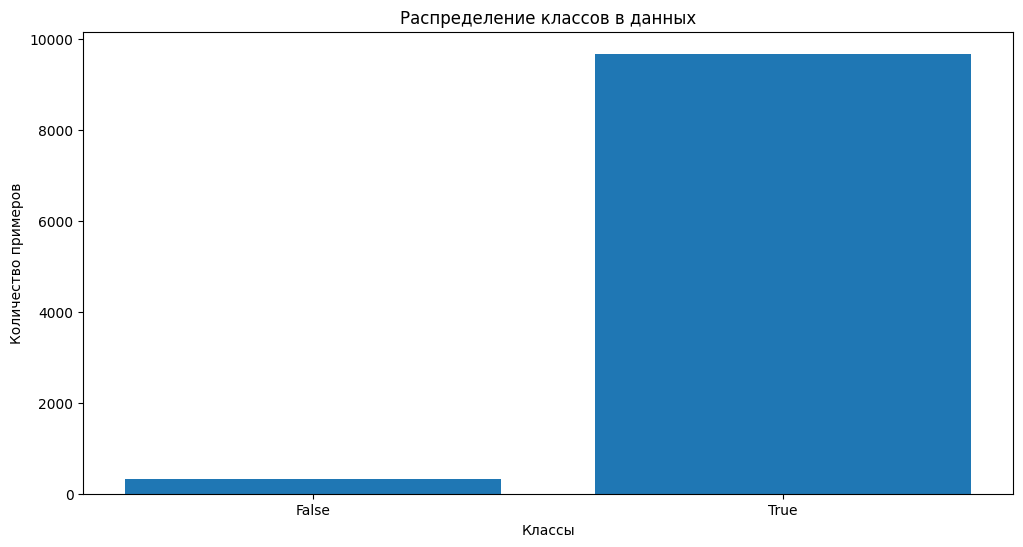

Класс False: 321 записей
Класс True: 9679 записей


In [25]:
count_true = np.sum(y_reshaped)
count_false = len(y_reshaped) - count_true

class_counts = np.array([count_false, count_true])

plt.figure(figsize=(12, 6))
plt.bar(['False', 'True'], class_counts)
plt.xlabel("Классы")
plt.ylabel("Количество примеров")
plt.title("Распределение классов в данных")
plt.show()

print(f"Класс False: {count_false} записей")
print(f"Класс True: {count_true} записей")

Несбалансированность классов действительно есть.


Применим два метода обработки несбалансированных классов и протестируем их с использованием классификаторов. Для этого мы будем использовать:

1. SMOTE — oversampling для увеличения меньшинственного класса.
1. Random UnderSampling — undersampling для уменьшения большего класса.

Результаты на оригинальных данных:
Результаты классификаторов (F1-score):
K-Nearest Neighbors: 0.9839
Random Forest: 0.9837
Logistic Regression: 0.9694
Support Vector Machine: 0.9531


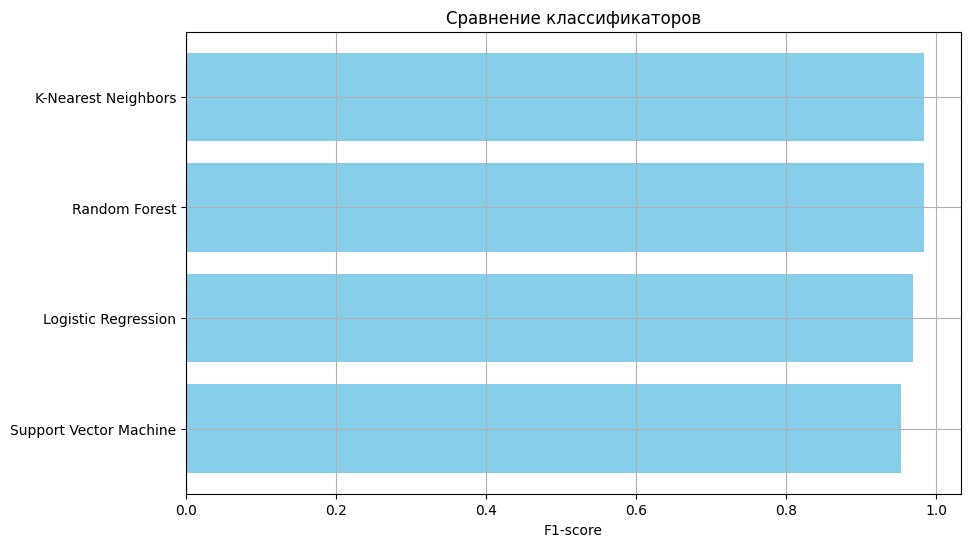

Результаты с SMOTE (oversampling):
Результаты классификаторов (F1-score):
Random Forest: 0.9701
Support Vector Machine: 0.9453
Logistic Regression: 0.9426
K-Nearest Neighbors: 0.1958


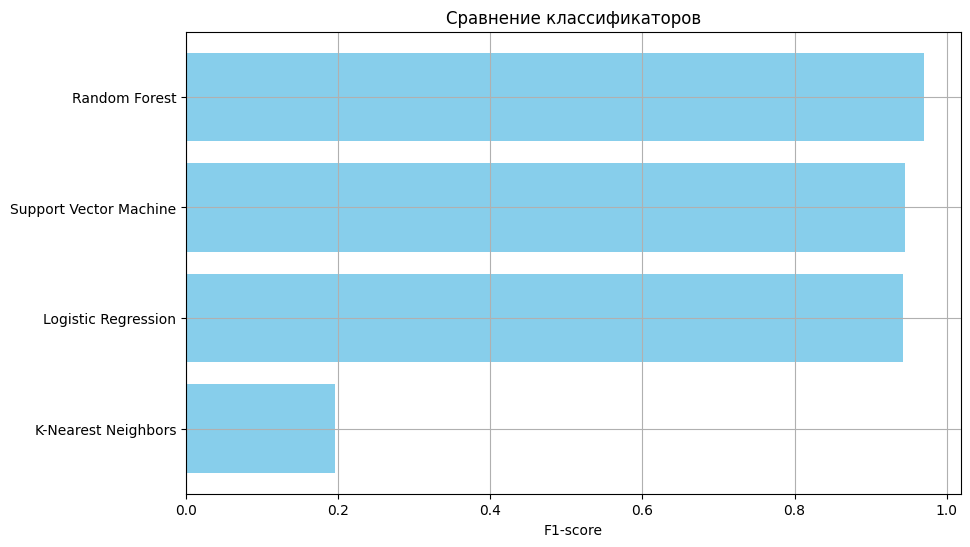

Результаты с Random UnderSampling:
Результаты классификаторов (F1-score):
Random Forest: 0.7888
Support Vector Machine: 0.7299
Logistic Regression: 0.7279
K-Nearest Neighbors: 0.4824


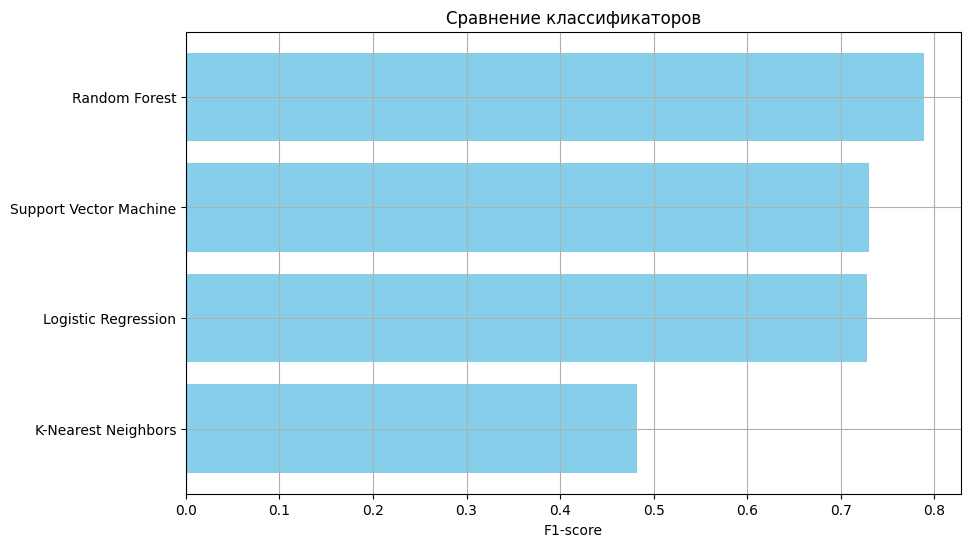

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Функция для тренировки и оценки классификаторов
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers, oversample=False, undersample=False):
    results = {}

    if oversample:
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    if undersample:
        under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
        X_train, y_train = under_sampler.fit_resample(X_train, y_train)

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_test_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_test_pred, average="binary")
        results[name] = f1

    return results

# Функция для вывода результатов
def print_results(results):
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    print("Результаты классификаторов (F1-score):")
    for name, score in sorted_results:
        print(f"{name}: {score:.4f}")

    # Построение графика
    names, scores = zip(*sorted_results)
    plt.figure(figsize=(10, 6))
    plt.barh(names, scores, color="skyblue")
    plt.xlabel("F1-score")
    plt.title("Сравнение классификаторов")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

# Оценка без обработки несбалансированности
print("Результаты на оригинальных данных:")
print_results(results)

# Оценка с применением SMOTE (oversampling)
results_smote = evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers, oversample=True)
print("Результаты с SMOTE (oversampling):")
print_results(results_smote)

# Оценка с применением Random UnderSampling
results_under = evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers, undersample=True)
print("Результаты с Random UnderSampling:")
print_results(results_under)

Результаты ухудшились. Причиной этому могут быть следующие:

1. SMOTE может работать хорошо в случае, когда модель достаточно сложная и может эффективно использовать синтетические данные. Однако в некоторых случаях это может привести к ухудшению результатов, особенно у K-Nearest Neighbors, где добавление синтетических точек может сильно изменить структуру данных.
1. Random UnderSampling может ухудшить результаты, так как он сокращает количество примеров для обучения, что может привести к потере важной информации, особенно для сложных моделей.

## 12. исключить коррелированные переменные (объяснить зачем)

In [27]:
# Определение порога корреляции
threshold = 0.9

# Список для исключения признаков
drop_columns = []

# Для каждой пары признаков
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            drop_columns.append(colname)

print("Удаленные признаки:", drop_columns)


Удаленные признаки: ['Канал 4', 'Канал 5', 'Канал 6', 'Канал 6', 'Канал 11', 'Канал 12']


Исключения коррелированный переменных делается по следующим причинам:

1. Проблемы с мультиколлинеарностью: Когда признаки сильно коррелируют между собой, модели могут страдать от мультиколлинеарности, особенно линейные модели, такие как логистическая регрессия. Мультиколлинеарность означает, что признаки вносят избыточную информацию, и модель может иметь сложности с правильным оцениванием их коэффициентов.

1. Переобучение: Модели могут переобучаться на избыточной информации. Когда признаки сильно коррелированы, модель может слишком точно подстроиться под обучающие данные, что снижает её способность обобщать на новых данных (плохая генерализация).

1. Ускорение обучения: Удаление коррелированных признаков может снизить размерность задачи, ускоряя процесс обучения, поскольку модель не будет "обрабатывать" избыточную информацию.

## 13. Сделать общие выводы

### Выводы по выполненному заданию

##### Общая оценка моделей

1. **K-ближайших соседей (KNN)**:
   - **Плюсы**: Простой и интуитивно понятный, работает с небольшими наборами данных.
   - **Минусы**: Чувствителен к выбору гиперпараметров и медленный на больших выборках. Результаты на тестовой выборке показали среднюю точность.

2. **Логистическая регрессия**:
   - **Плюсы**: Быстрая и легко интерпретируемая.
   - **Минусы**: Плохо справляется с нелинейными зависимостями. Точность на уровне KNN, но снижается на несбалансированных данных.

3. **Метод опорных векторов (SVM)**:
   - **Плюсы**: Эффективен при высоких измерениях и сложных границах.
   - **Минусы**: Чувствителен к выбору ядра и может требовать больших ресурсов.
   - **Результаты**: Высокая точность, делает его предпочтительным методом.

4. **Случайный лес**:
   - **Плюсы**: Устойчив к переобучению, хорошо работает с несбалансированными данными.
   - **Минусы**: Меньшая интерпретируемость.
   - **Результаты**: Наивысшая точность среди всех моделей, рекомендуется для данной задачи.